# ZMUM Projekt 2

## Import danych

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

train_data = pd.read_csv("artificial_train.data", sep=' ',header=None)
train_labels = pd.read_csv("artificial_train.labels", sep=' ',header=None)
valid_data = pd.read_csv("artificial_valid.data",sep=' ',header=None)

In [2]:
train_data.shape

(2000, 501)

In [3]:
train_data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,485,477,537,479,452,471,491,476,475,473,...,481,477,485,511,485,481,479,475,496,NaN
1,483,458,460,487,587,475,526,479,485,469,...,478,487,338,513,486,483,492,510,517,NaN
2,487,542,499,468,448,471,442,478,480,477,...,481,492,650,506,501,480,489,499,498,NaN
3,480,491,510,485,495,472,417,474,502,476,...,480,474,572,454,469,475,482,494,461,NaN
4,484,502,528,489,466,481,402,478,487,468,...,479,452,435,486,508,481,504,495,511,NaN


In [4]:
train_labels.head(5)

,0
0,-1
1,-1
2,-1
3,1
4,1


In [5]:
# nie ma brakujacych danych, wszystkie zmienne są numeryczne
train_data.drop(500, axis=1, inplace=True)
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,481.722500,483.452500,510.166000,483.384500,501.612500,479.259000,480.109500,476.565000,486.793500,478.78900,...,482.458500,478.811500,486.356500,496.565500,493.49950,510.893000,478.219500,483.309000,507.977000,490.266000
std,6.421769,30.186294,38.899165,9.059895,41.389418,6.795956,40.575925,1.384461,15.043836,7.19092,...,20.890033,4.011735,23.967366,127.635442,34.81902,37.459353,5.880613,13.559847,37.224297,25.825273
min,462.000000,381.000000,370.000000,453.000000,371.000000,459.000000,334.000000,471.000000,430.000000,455.00000,...,407.000000,463.000000,391.000000,130.000000,368.00000,398.000000,457.000000,435.000000,363.000000,403.000000
25%,477.000000,464.000000,485.000000,477.000000,475.000000,475.000000,452.750000,476.000000,477.000000,474.00000,...,468.000000,476.000000,471.000000,404.000000,470.00000,486.000000,474.000000,474.000000,482.000000,473.000000
50%,482.000000,483.000000,510.500000,483.000000,500.000000,479.000000,480.000000,477.000000,487.000000,479.00000,...,482.000000,479.000000,486.000000,504.000000,492.00000,511.000000,478.000000,483.000000,508.000000,490.000000
75%,486.000000,503.000000,536.000000,490.000000,528.000000,484.000000,506.250000,477.000000,496.250000,484.00000,...,496.000000,481.000000,502.000000,586.000000,517.00000,535.000000,482.000000,492.000000,533.000000,507.250000
max,503.000000,600.000000,654.000000,519.000000,688.000000,505.000000,611.000000,481.000000,536.000000,503.00000,...,549.000000,497.000000,566.000000,920.000000,615.00000,661.000000,500.000000,535.000000,644.000000,583.000000


## 1. Wstępne przetworzenie danych

### 1.1. Sprawdzenie korelacji pomiedzy danymi

In [6]:
def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)

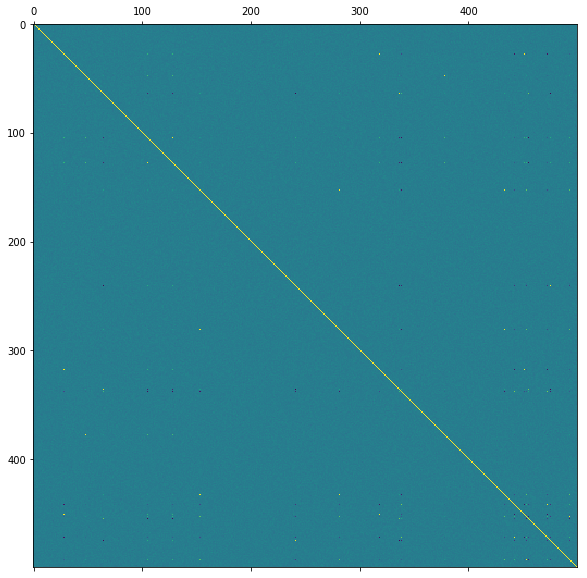

In [7]:
plot_corr(train_data)

In [8]:
from itertools import combinations

column_combinations = list(combinations(train_data.columns.values, 2))

correlated = []

for element in column_combinations:
    corr_val = train_data[element[0]].corr(train_data[element[1]])
    if(corr_val > 0.95):
        correlated.append((element[0],element[1]))        

In [9]:
len(column_combinations)

124750

In [10]:
len(correlated)

12

In [11]:
correlated

[(28, 318),
 (28, 451),
 (48, 378),
 (64, 336),
 (105, 128),
 (153, 281),
 (153, 433),
 (241, 475),
 (281, 433),
 (318, 451),
 (442, 472),
 (453, 493)]

### Usunięcie kolumn które są skorelowane - wybranie jednej z dwóch skorelowanych

Na zbiorze danych z usuniętymi najbardziej skorelowanymi kolumnami będą przeprowadzane wszystkie kolejne eksperymenty z wybieraniem najlepszych cech

In [12]:
train_data_1 = train_data.copy()

for element in correlated:
    if(element[0] in train_data_1.columns and element[1] in train_data_1.columns):
        print(element[1])
        train_data_1.drop(element[1],axis=1, inplace=True)

318
451
378
336
128
281
433
475
472
493


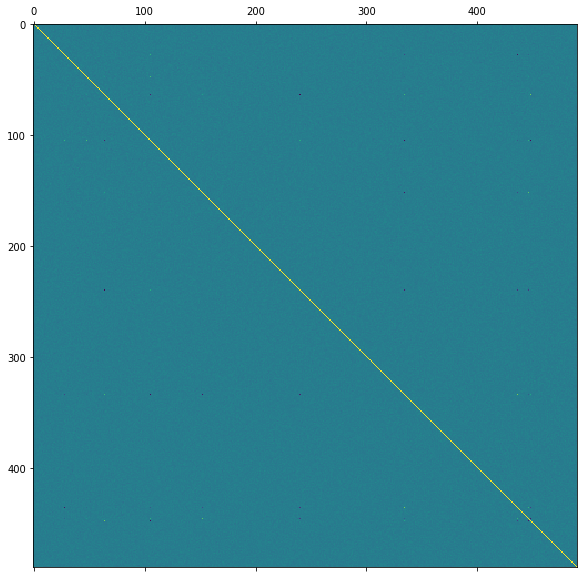

In [13]:
plot_corr(train_data_1)

## 2. Przetestowanie różnych modeli

Zdecydowano się już w tym momencie sprawdzić, który model będzie osiągał najlepsze skuteczności na analizowanych danych, tak aby kolejne metody selekcji zmiennych były testowane od razu na najlepiej pasującym modelu.

In [17]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import random

y = train_labels.values.ravel()
X = train_data_1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

knn_classifier = KNeighborsClassifier(54)
y_pred = knn_classifier.fit(X_train, y_train).predict(X_test)
acc = balanced_accuracy_score(y_test, y_pred)

print("KNN balanced accuracy: " + str(acc))

SVC_1_classifier = SVC(gamma=2)
y_pred = SVC_1_classifier.fit(X_train, y_train).predict(X_test)
acc = balanced_accuracy_score(y_test, y_pred)

print("SVC balanced accuracy: " + str(acc))


RF_classifier = RandomForestClassifier(max_depth=65, n_estimators=450)
y_pred = RF_classifier.fit(X_train, y_train).predict(X_test)
acc = balanced_accuracy_score(y_test, y_pred)

print("RandomForest balanced accuracy: " + str(acc))

KNN balanced accuracy: 0.6573427857772554
SVC balanced accuracy: 0.5
RandomForest balanced accuracy: 0.6171209227152512


Przetestowano trzy wybrane modele (ze zmienianymi ręcznie parametrami) i z wstępnych testów wynika, że najlepiej radzi sobie model KNN. Niewiele gorzej jednak radzi sobie Random Forest, dlatego do dalszych testów przygotowano te dwa wybrane modele.

### Implementacja modeli wraz z optymalizacją hiperparametrów

In [96]:
def random_forest_random_search(iter_num,_X_train,_y_train,_X_test,_y_test):
    final_prec = 0
    depths = list(range(15, 70))
    max_features_type = ['auto','log2',None]
    n_est = list(range(20, 70))

    for i in range(iter_num):
        n = random.choice(n_est)
        m_d = random.choice(depths)
        m_f = random.choice(max_features_type)

        random_forest = RandomForestClassifier(n_estimators=n*10, max_depth=m_d,max_features=m_f,random_state=0)
        y_pred = random_forest.fit(_X_train, _y_train).predict(_X_test)
        acc = balanced_accuracy_score(_y_test, y_pred)

        if(final_prec<acc):
            final_prec = acc
            chosen_n_estim = n*10
            chosen_max_depth = m_d
            chosen_max_features = m_f
            chosen_model = random_forest
    
    print("Balanced accuracy: " + str(final_prec))
    print("chosen_n_estim: " + str(chosen_n_estim))
    print("chosen_max_depth: " + str(chosen_max_depth))
    print("chosen_max_features: " + str(chosen_max_features))
    print("------------")
        
    return(final_prec, chosen_model)

In [76]:
def KNN_random_search(iter_num,_X_train,_y_train,_X_test,_y_test):
    final_prec = 0
    n_neighb = list(range(20, 100))
    
    for i in range(iter_num):
        n = random.choice(n_neighb)

        knn = KNeighborsClassifier(n)
        y_pred = knn.fit(_X_train, _y_train).predict(_X_test)
        acc = balanced_accuracy_score(_y_test, y_pred)

        if(final_prec<acc):
            final_prec = acc
            chosen_n = n
            chosen_model = knn

    print("Balanced accuracy: " + str(final_prec))
    print("N_Neighbours: " + str(chosen_n))
    print("------------")
        
    return(final_prec, chosen_model)

## 3. Metody selekcji zmiennych

## 3. 1. Metoda KBest

Wykorzystanie testu statystycznego do wybrania tych cech, które mają najsilniejszy związek ze zmienną wyjściową.

## Sprawdzenie jak zmienia sie skutecznosc modelu w zaleznosci od ilosci zmiennych - metoda KBest

In [77]:
from sklearn.feature_selection import SelectKBest, chi2

def feature_number_accuracy(n,m,data,model_name):
    
    feature_numbers = []
    accuracies = []
    models = []
    
    for i in range(n,m+1):
        
        feature_numbers.append(i)
        
        selector = SelectKBest(chi2, k=i)

        new_data = selector.fit_transform(data, train_labels)
        print("\nWymiary nowej ramki danych:")
        print(new_data.shape)
        print("Wybrane kolumny:")
        selected = selector.get_support(indices=True)
        print(selected)
        print("\n")

        new_data = pd.DataFrame(new_data,columns=selected)

        y = train_labels.values.ravel()
        X = new_data

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        
        if(model_name=="KNN"):
            acc, model = KNN_random_search(40,X_train, y_train, X_test, y_test)
        if(model_name=="RandomForest"):
            acc, model = random_forest_random_search(80,X_train, y_train, X_test, y_test)
    
        accuracies.append(acc)
        
        models.append(model)
    
    d = {'Features_number' : feature_numbers,
     'Balanced_accuracy': accuracies}

    feature_number_acc = pd.DataFrame(data = d)
    
    return feature_number_acc, models

In [78]:
feature_KBest_knn, knn_list = feature_number_accuracy(3,15,train_data_1,"KNN")


Wymiary nowej ramki danych:
(2000, 3)
Wybrane kolumny:
[ 64 105 334]


Balanced accuracy: 0.7077394945636204
N_Neighbours: 20
------------

Wymiary nowej ramki danych:
(2000, 4)
Wybrane kolumny:
[ 64 105 240 334]


Balanced accuracy: 0.7533059065530414
N_Neighbours: 20
------------

Wymiary nowej ramki danych:
(2000, 5)
Wybrane kolumny:
[ 64 105 240 334 436]


Balanced accuracy: 0.7834998530708199
N_Neighbours: 23
------------

Wymiary nowej ramki danych:
(2000, 6)
Wybrane kolumny:
[ 64 105 240 334 436 446]


Balanced accuracy: 0.8077615339406405
N_Neighbours: 20
------------

Wymiary nowej ramki danych:
(2000, 7)
Wybrane kolumny:
[ 48  64 105 240 334 436 446]


Balanced accuracy: 0.8440714075815456
N_Neighbours: 22
------------

Wymiary nowej ramki danych:
(2000, 8)
Wybrane kolumny:
[ 48  64 105 152 240 334 436 446]


Balanced accuracy: 0.8502240669997061
N_Neighbours: 20
------------

Wymiary nowej ramki danych:
(2000, 9)
Wybrane kolumny:
[ 48  64 105 152 240 334 406 436 446]


Bala

In [79]:
feature_KBest_knn

,Features_number,Balanced_accuracy
0,3,0.707739
1,4,0.753306
2,5,0.783500
3,6,0.807762
4,7,0.844071
5,8,0.850224
6,9,0.832060
7,10,0.842492
8,11,0.823024
9,12,0.836486


In [80]:
feature_KBest_rf, rf_list = feature_number_accuracy(3,15,train_data_1,"RandomForest")


Wymiary nowej ramki danych:
(2000, 3)
Wybrane kolumny:
[ 64 105 334]


Balanced accuracy: 0.6925690567146635
chosen_n_estim: 200
chosen_max_depth: 15
chosen_max_features: log2
------------

Wymiary nowej ramki danych:
(2000, 4)
Wybrane kolumny:
[ 64 105 240 334]


Balanced accuracy: 0.744122832794593
chosen_n_estim: 470
chosen_max_depth: 30
chosen_max_features: log2
------------

Wymiary nowej ramki danych:
(2000, 5)
Wybrane kolumny:
[ 64 105 240 334 436]


Balanced accuracy: 0.8166323831913018
chosen_n_estim: 330
chosen_max_depth: 49
chosen_max_features: None
------------

Wymiary nowej ramki danych:
(2000, 6)
Wybrane kolumny:
[ 64 105 240 334 436 446]


Balanced accuracy: 0.8408940640611225
chosen_n_estim: 420
chosen_max_depth: 65
chosen_max_features: log2
------------

Wymiary nowej ramki danych:
(2000, 7)
Wybrane kolumny:
[ 48  64 105 240 334 436 446]


Balanced accuracy: 0.8651741110784602
chosen_n_estim: 440
chosen_max_depth: 35
chosen_max_features: auto
------------

Wymiary no

In [81]:
feature_KBest_rf

,Features_number,Balanced_accuracy
0,3,0.692569
1,4,0.744123
2,5,0.816632
3,6,0.840894
4,7,0.865174
5,8,0.866643
6,9,0.866643
7,10,0.863631
8,11,0.854540
9,12,0.851583


### Wykres zależności liczby zmiennych od skuteczności dla metody KBest

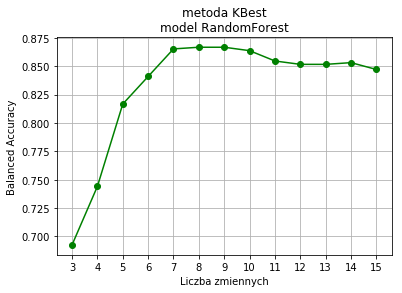

In [82]:
fig = plt.plot('Features_number','Balanced_accuracy', data=feature_KBest_rf,color='green', marker='o')

plt.title('metoda KBest\nmodel RandomForest')

plt.xlabel('Liczba zmiennych')
plt.ylabel('Balanced Accuracy')

xticks = feature_KBest_rf['Features_number'].values
ticklabels = list(map(str,xticks))
plt.xticks(xticks, ticklabels)
plt.grid(True)

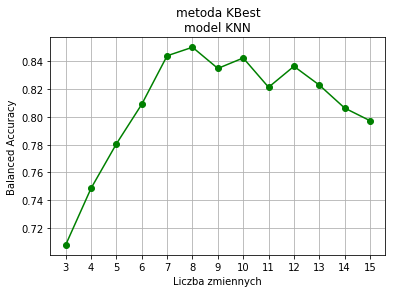

In [171]:
fig = plt.plot('Features_number', 'Balanced_accuracy', data=feature_KBest_knn,color='green', marker='o')

plt.title('metoda KBest\nmodel KNN')

plt.xlabel('Liczba zmiennych')
plt.ylabel('Balanced Accuracy')

xticks = feature_KBest_knn['Features_number'].values
ticklabels = list(map(str,xticks))
plt.xticks(xticks, ticklabels)
plt.grid(True)

## 3.2. Metoda Lasso

In [137]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel


def lasso_accuracy(data, model_name):
    
    c_values = range(2,16)
    feature_numbers = []
    accuracies = []
    
    for i in c_values:

        X, y = data, train_labels.values.ravel()

        lsvc = LinearSVC(C=i*1e-5, penalty="l1", dual=False, max_iter=12000).fit(X, y)
        model = SelectFromModel(lsvc, prefit=True)
        feature_idx = model.get_support()
        feature_names = X.columns[feature_idx]

        new_data = model.transform(X)
        print("Liczba kolumn po zastosowaniu Lasso: " + str(new_data.shape[1]))
        print("Wybrane kolumny:")
        print(feature_names.values)
        
        y = train_labels.values.ravel()
        X = new_data

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        
        if(model_name=="KNN"):
            acc = KNN_random_search(40,X_train, y_train, X_test, y_test)
        
        if(model_name=="RandomForest"):
            acc = random_forest_random_search(80,X_train, y_train, X_test, y_test)
            
        feature_numbers.append(new_data.shape[1])
        accuracies.append(acc)
    
    
    d = {'Features_number' : feature_numbers,
         'Accuracy': accuracies}

    feature_number_acc = pd.DataFrame(data = d)
    
    return feature_number_acc


In [138]:
lasso_knn = lasso_accuracy(train_data_1,"KNN")

Liczba kolumn po zastosowaniu Lasso: 2
Wybrane kolumny:
[ 64 105]
Balanced accuracy: 0.6517594769321187
N_Neighbours: 89
------------
Liczba kolumn po zastosowaniu Lasso: 3
Wybrane kolumny:
[ 64 105 453]
Balanced accuracy: 0.7292462533059065
N_Neighbours: 25
------------
Liczba kolumn po zastosowaniu Lasso: 5
Wybrane kolumny:
[ 64 105 241 338 453]
Balanced accuracy: 0.7880546576550103
N_Neighbours: 21
------------
Liczba kolumn po zastosowaniu Lasso: 5
Wybrane kolumny:
[ 64 105 241 338 453]
Balanced accuracy: 0.7880546576550103
N_Neighbours: 21
------------
Liczba kolumn po zastosowaniu Lasso: 5
Wybrane kolumny:
[ 64 105 241 338 453]
Balanced accuracy: 0.7880546576550103
N_Neighbours: 21
------------
Liczba kolumn po zastosowaniu Lasso: 5
Wybrane kolumny:
[ 64 105 241 338 453]
Balanced accuracy: 0.7835733176608874
N_Neighbours: 23
------------
Liczba kolumn po zastosowaniu Lasso: 5
Wybrane kolumny:
[ 64 105 241 338 453]
Balanced accuracy: 0.7776594181604466
N_Neighbours: 26
-----------

In [149]:
lasso_knn = lasso_knn.groupby('Features_number')['Accuracy'].mean().reset_index()
lasso_knn

,Features_number,Accuracy
0,2,0.651759
1,3,0.729246
2,5,0.785079
3,6,0.822987
4,8,0.759477
5,9,0.783647
6,10,0.765593
7,14,0.754757
8,17,0.733672


In [155]:
lasso_rf = lasso_accuracy(train_data_1,"RandomForest")

Liczba kolumn po zastosowaniu Lasso: 2
Wybrane kolumny:
[ 64 105]
Balanced accuracy: 0.608984719365266
chosen_n_estim: 650
chosen_max_depth: 17
chosen_max_features: None
------------
Liczba kolumn po zastosowaniu Lasso: 3
Wybrane kolumny:
[ 64 105 453]
Balanced accuracy: 0.7168858360270349
chosen_n_estim: 330
chosen_max_depth: 18
chosen_max_features: auto
------------
Liczba kolumn po zastosowaniu Lasso: 5
Wybrane kolumny:
[ 64 105 241 338 453]
Balanced accuracy: 0.8153100205700852
chosen_n_estim: 660
chosen_max_depth: 41
chosen_max_features: log2
------------
Liczba kolumn po zastosowaniu Lasso: 5
Wybrane kolumny:
[ 64 105 241 338 453]
Balanced accuracy: 0.8138039964736996
chosen_n_estim: 630
chosen_max_depth: 65
chosen_max_features: auto
------------
Liczba kolumn po zastosowaniu Lasso: 5
Wybrane kolumny:
[ 64 105 241 338 453]
Balanced accuracy: 0.8153100205700852
chosen_n_estim: 660
chosen_max_depth: 30
chosen_max_features: auto
------------
Liczba kolumn po zastosowaniu Lasso: 5
Wy

### Wykresy zależności liczby zmiennych od skuteczności dla metody Lasso

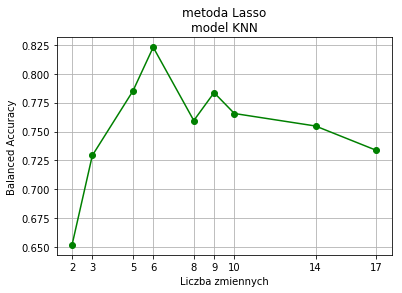

In [157]:
fig = plt.plot('Features_number', 'Accuracy', data=lasso_knn,color='green', marker='o')

plt.title('metoda Lasso\nmodel KNN')

plt.xlabel('Liczba zmiennych')
plt.ylabel('Balanced Accuracy')

xticks = lasso_knn['Features_number'].values
ticklabels = list(map(str,xticks))
plt.xticks(xticks, ticklabels)
plt.grid(True)

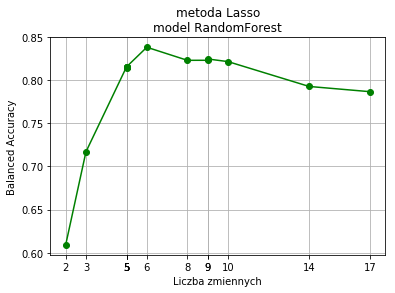

In [159]:
fig = plt.plot('Features_number', 'Accuracy', data=lasso_rf,color='green', marker='o')

plt.title('metoda Lasso\nmodel RandomForest')

plt.xlabel('Liczba zmiennych')
plt.ylabel('Balanced Accuracy')

xticks = lasso_rf['Features_number'].values
ticklabels = list(map(str,xticks))
plt.xticks(xticks, ticklabels)
plt.grid(True)

Wyniki uzyskane metodą Lasso są gorsze niż metodą KBest, jednak wybrano model Lasso ponieważ nie udało się powtórzyć dobrego wyniku z metody KBest.

### Model policzony na wybranych najlepszych danych

In [113]:
chosen_features = [48, 64, 105, 241, 338, 453]

In [114]:
chosen_dataset = pd.DataFrame(train_data_1,columns=chosen_features)

y = train_labels.values.ravel()
X = chosen_dataset

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y, test_size=0.33, random_state=42)

In [117]:
chosen_random_forest = RandomForestClassifier(n_estimators=300, max_depth=21,max_features='auto',random_state=0)
y_pred = chosen_random_forest.fit(X_train_b, y_train_b).predict(X_test_b)
acc = balanced_accuracy_score(y_test_b, y_pred)

In [118]:
acc

0.8304620922715251

## Eksport wyników

In [120]:
valid_data.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,483,454,513,495,523,469,453,477,506,479,...,480,543,259,413,520,485,498,523,510,NaN
1,485,508,493,487,478,472,504,476,479,475,...,480,535,534,514,452,484,495,548,477,NaN
2,483,521,507,475,493,486,421,475,496,483,...,476,498,495,508,528,486,465,508,503,NaN
3,474,504,576,480,553,483,524,478,483,483,...,475,470,463,509,525,479,467,552,517,NaN
4,495,474,523,479,495,488,485,476,497,478,...,471,522,343,509,520,475,493,506,491,NaN


In [124]:
valid_data.drop(500, axis=1, inplace=True)

In [127]:
valid_data = pd.DataFrame(valid_data,columns=chosen_features)

In [130]:
y = train_labels.values.ravel()
X = chosen_dataset

In [131]:
y_predicted_results = chosen_random_forest.fit(X,y).predict_proba(valid_data)

In [132]:
y_predicted_results[:,1]

array([0.16550327, 0.18      , 0.47666667, 0.81      , 0.35      ,
       0.95666667, 0.125     , 0.24666667, 0.37583333, 0.89666667,
       0.88666667, 0.92333333, 0.2       , 0.78666667, 0.77909091,
       0.04333333, 0.24666667, 0.99666667, 0.38666667, 0.10333333,
       0.5       , 0.09333333, 0.02666667, 0.66666667, 0.84333333,
       0.95      , 0.15666667, 0.63601587, 0.46666667, 0.09666667,
       0.07333333, 0.59      , 0.80989583, 0.79989583, 0.78      ,
       0.24      , 0.79242424, 0.97666667, 0.76333333, 0.76666667,
       0.63829762, 0.91666667, 0.71801587, 0.92      , 0.39333333,
       0.95      , 0.22      , 0.66666667, 0.31      , 0.46333333,
       0.79333333, 0.37      , 0.57333333, 0.65555556, 0.65      ,
       0.12666667, 0.95666667, 0.39666667, 0.7402803 , 0.09      ,
       0.87333333, 0.13333333, 0.53666667, 0.55666667, 0.82666667,
       0.3102381 , 0.24666667, 0.75333333, 0.35      , 0.49      ,
       0.88      , 0.21333333, 0.94      , 0.76666667, 0.9    

In [134]:
with open("KATSPA_artificial_prediction.txt", "w") as file:
    file.write("\"KATSPA\"" + "\n")
    for element in y_predicted_results[:,1]:
        file.write(str(element)+"\n")
    

In [136]:
with open("KATSPA_artificial_features.txt", "w") as file:
    file.write("\"KATSPA\"" + "\n")
    for element in chosen_features:
        file.write(str(element)+"\n")